In [51]:
import pandas as pd
import psycopg2 as pg
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import sqlalchemy
import pandas.io.sql as psql
import numpy as np
import geopandas 
import descartes
import geojson
import scheme
import mapclassify
import json
import jenkspy
import altair as alt
alt.renderers.enable('notebook')
import geopandas as gpd
import altair_latimes as lat

ValueError: 
To use the 'notebook' renderer, you must install the vega package
and the associated Jupyter extension.
See https://altair-viz.github.io/getting_started/installation.html
for more information.


In [17]:
database_con = pg.connect("dbname=campaigns user=postgres")

In [18]:
alldonations =  psql.read_sql("SELECT * FROM contributions", database_con)

In [19]:
alldonations.head(5)

,Last Name,First Name,Committee ID,Committee Name,Office Type,District Number,Schedule,Type,Date,Amount Rcvd,...,Employer,Int Name,Int City,Int State,Int Zip Code,Int Occupation,Int Employer,Doc ID,Rec ID,x
0,Barger,Kathryn,1414462,Kathryn Barger for Supervisor 2020,CSU,C05,A,I,2018-12-31,-1500.0,...,Miller Barondess LLP,,,,,,,,2557,164955
1,Barger,Kathryn,1414462,Kathryn Barger for Supervisor 2020,CSU,C05,A,I,2018-12-31,-250.0,...,"Miller Barondess, LLP",,,,,,,,2557,164953
2,Barger,Kathryn,1414462,Kathryn Barger for Supervisor 2020,CSU,C05,A,I,2018-12-31,100.0,...,Bruce Burch,,,,,,,,2557,164852
3,Barger,Kathryn,1414462,Kathryn Barger for Supervisor 2020,CSU,C05,A,I,2018-12-31,250.0,...,"Miller Barondess, LLP",,,,,,,,2557,164952
4,Barger,Kathryn,1414462,Kathryn Barger for Supervisor 2020,CSU,C05,A,I,2018-12-31,250.0,...,"Palmer, Lombardi & Donohue LLP",,,,,,,,2557,164969


In [20]:
alldonations.columns = alldonations.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [21]:
alldonations['nu_date'] = pd.to_datetime(alldonations['date'].astype('str'), format = '%Y-%m-%d')

In [22]:
alldonations['nu_date'] = pd.to_datetime(alldonations['nu_date'])
alldonations['year'], alldonations['month'] = alldonations['nu_date'].dt.year, alldonations['nu_date'].dt.month
alldonations['year'] = alldonations['year'].astype(object)
alldonations['month'] = alldonations['month'].astype(object)

In [23]:
sumyear = alldonations.groupby(['year'], as_index=False).agg({"amount_rcvd": "sum"})
sumzips = alldonations.groupby(['contributor_zip_code'], as_index=False).agg({"amount_rcvd": "sum"})

In [24]:
sumzips

,contributor_zip_code,amount_rcvd
0,,135121.00
1,0,21550.00
2,10001,9150.00
3,10003,12700.00
4,10004,2600.00
5,10005,1000.00
6,10006,2500.00
7,10007,1400.00
8,10010,4550.00
9,10011,23000.00


In [25]:
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

ThemeRegistry.enable('latimes')

In [26]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [27]:
%matplotlib inline

In [28]:
zipsmap = gpd.read_file("/Users/mhustiles/Desktop/github/la-supervisors-donations-2020/gis/la_county_gis_zipcodes/zip.geojson")

,Shape.area,Shape.len,OBJECTID,ZIPCODE,geometry
0,191184.208318,1801.702222,180,91046,POLYGON ((-118.2401427496653 34.21173137965621...
1,485596.910406,3122.780185,1547,90802,POLYGON ((-118.1794699104521 33.75926636656992...
2,529034.739428,3207.853051,1550,90803,"POLYGON ((-118.139252990088 33.74106131338934,..."
3,569833.507854,3263.754249,1548,90803,POLYGON ((-118.1616673233808 33.75252926496561...
4,655606.076655,3729.233159,1549,90803,POLYGON ((-118.1630169883998 33.74316836043942...


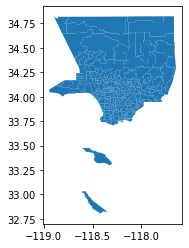

In [29]:
zipsmap.plot()
zipsmap.head()

In [30]:
merged = zipsmap.merge(
    sumzips[['contributor_zip_code', "amount_rcvd"]],
    left_on="ZIPCODE",
    right_on="contributor_zip_code"
)

In [31]:
merged

,Shape.area,Shape.len,OBJECTID,ZIPCODE,geometry,contributor_zip_code,amount_rcvd
0,1.911842e+05,1801.702222,180,91046,POLYGON ((-118.2401427496653 34.21173137965621...,91046,400.00
1,4.855969e+05,3122.780185,1547,90802,POLYGON ((-118.1794699104521 33.75926636656992...,90802,333228.34
2,1.684347e+08,181881.275506,152,90802,POLYGON ((-118.2022867821767 33.77538107468417...,90802,333228.34
3,5.290347e+05,3207.853051,1550,90803,"POLYGON ((-118.139252990088 33.74106131338934,...",90803,283417.52
4,5.698335e+05,3263.754249,1548,90803,POLYGON ((-118.1616673233808 33.75252926496561...,90803,283417.52
5,6.556061e+05,3729.233159,1549,90803,POLYGON ((-118.1630169883998 33.74316836043942...,90803,283417.52
6,1.370339e+08,68577.141206,153,90803,POLYGON ((-118.1129122997938 33.77547037251501...,90803,283417.52
7,8.726478e+05,3993.205300,164,90831,"POLYGON ((-118.201848708862 33.76766771395363,...",90831,12550.00
8,1.063860e+06,4621.470557,125,90623,"POLYGON ((-118.0504116439012 33.852418716076, ...",90623,16499.99
9,4.584444e+06,8510.138922,118,90506,POLYGON ((-118.3265232370205 33.88292053492442...,90506,500.00


In [32]:
trimmed = merged[[
    'Shape.area',
    'Shape.len',
    'OBJECTID',
    'ZIPCODE',
    'geometry',
    'contributor_zip_code',
    'amount_rcvd'
]].rename(columns={
    "Shape.area": "area",
    "Shape.len": "len",
    "OBJECTID": "id",
    "ZIPCODE": "zip",
    "amount_rcvd": "amount",
    "geometry": "geometry",
})

In [33]:
trimmed

,area,len,id,zip,geometry,contributor_zip_code,amount
0,1.911842e+05,1801.702222,180,91046,POLYGON ((-118.2401427496653 34.21173137965621...,91046,400.00
1,4.855969e+05,3122.780185,1547,90802,POLYGON ((-118.1794699104521 33.75926636656992...,90802,333228.34
2,1.684347e+08,181881.275506,152,90802,POLYGON ((-118.2022867821767 33.77538107468417...,90802,333228.34
3,5.290347e+05,3207.853051,1550,90803,"POLYGON ((-118.139252990088 33.74106131338934,...",90803,283417.52
4,5.698335e+05,3263.754249,1548,90803,POLYGON ((-118.1616673233808 33.75252926496561...,90803,283417.52
5,6.556061e+05,3729.233159,1549,90803,POLYGON ((-118.1630169883998 33.74316836043942...,90803,283417.52
6,1.370339e+08,68577.141206,153,90803,POLYGON ((-118.1129122997938 33.77547037251501...,90803,283417.52
7,8.726478e+05,3993.205300,164,90831,"POLYGON ((-118.201848708862 33.76766771395363,...",90831,12550.00
8,1.063860e+06,4621.470557,125,90623,"POLYGON ((-118.0504116439012 33.852418716076, ...",90623,16499.99
9,4.584444e+06,8510.138922,118,90506,POLYGON ((-118.3265232370205 33.88292053492442...,90506,500.00


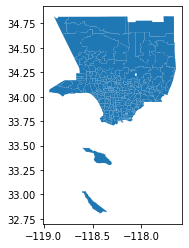

In [34]:
trimmed.plot()

In [35]:
filtered = trimmed[trimmed.zip != '90704']

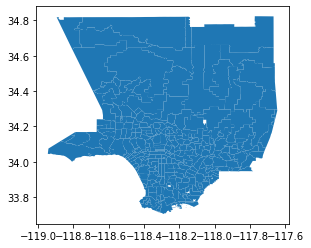

In [36]:
filtered.plot()

In [37]:
filtered.crs

{'init': 'epsg:4326'}

In [38]:
transformed = filtered.to_crs(epsg=4326)

In [39]:
transformed

,area,len,id,zip,geometry,contributor_zip_code,amount
0,1.911842e+05,1801.702222,180,91046,POLYGON ((-118.2401427496653 34.21173137965621...,91046,400.00
1,4.855969e+05,3122.780185,1547,90802,POLYGON ((-118.1794699104521 33.75926636656992...,90802,333228.34
2,1.684347e+08,181881.275506,152,90802,POLYGON ((-118.2022867821767 33.77538107468417...,90802,333228.34
3,5.290347e+05,3207.853051,1550,90803,"POLYGON ((-118.139252990088 33.74106131338934,...",90803,283417.52
4,5.698335e+05,3263.754249,1548,90803,POLYGON ((-118.1616673233808 33.75252926496561...,90803,283417.52
5,6.556061e+05,3729.233159,1549,90803,POLYGON ((-118.1630169883998 33.74316836043942...,90803,283417.52
6,1.370339e+08,68577.141206,153,90803,POLYGON ((-118.1129122997938 33.77547037251501...,90803,283417.52
7,8.726478e+05,3993.205300,164,90831,"POLYGON ((-118.201848708862 33.76766771395363,...",90831,12550.00
8,1.063860e+06,4621.470557,125,90623,"POLYGON ((-118.0504116439012 33.852418716076, ...",90623,16499.99
9,4.584444e+06,8510.138922,118,90506,POLYGON ((-118.3265232370205 33.88292053492442...,90506,500.00


In [40]:
breaks = jenkspy.jenks_breaks(list(transformed.amount), nb_class=7)

In [41]:
breaks

[100.0,
 86948.75,
 204875.0,
 374795.97,
 594246.42,
 822242.87,
 1150856.2999999998,
 1637781.43]

In [42]:
geojson = json.loads(transformed.to_json())

In [43]:
features = alt.Data(values=geojson['features'])

In [50]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
